## moral of this notebook
there are subtle differences betewen ccl preditiction of hmf with tinker08 and my impelmentation that stem from subtle differences in the predicition of the matter power spectrum between CLASS (what I use) and CAMB (what CCL uses by default) that is documented in various github issues. The differences is ~percent and less for redshifts that are acessible for cluster cosmology. using either ccl or my implementation qualtivavely (and roughly quantitavely) lead to same level of precision  

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
from aemulusnu_massfunction.emulator_training import *
from aemulusnu_massfunction.fisher_utils import *
from aemulusnu_hmf import massfunction as hmf

In [3]:
fiducial_cosmology = {'10^9 As':2.09681,
                      'ns': 0.9652,
                      'H0': 67.37,
                      'w0': -1,
                      'ombh2': 0.02233,
                      'omch2': 0.1198,
                      'nu_mass_ev': 0.06,}

fiducial_cosmo_vals = get_cosmo_vals(fiducial_cosmology)

fiducial_ccl_cosmo = get_ccl_cosmology(tuple(fiducial_cosmo_vals))
cosmology = hmf.cosmology(fiducial_cosmology)

In [4]:
emulator = Tinker08()

In [5]:
M = 10**np.linspace(14, 16, 150)

In [6]:
h = fiducial_cosmology['H0']/100

In [7]:

def plot_stuff(curr_redshift):
    hmfs = []
    # Tinker 2008 mass function
    hmfs.append(ccl.halos.MassFuncTinker08(mass_def='200m', mass_def_strict=False))


    # Let's plot all of them at z=0
    plt.figure()
    dn_dM = emulator(cosmology, M, redshiftToScale(curr_redshift))
    plt.plot(M, dn_dM, 'k',label='my Tinker08')

    for mf in tqdm(hmfs):
        nm = mf(fiducial_ccl_cosmo, M/h, redshiftToScale(curr_redshift))
        plt.plot(M, nm/(h**3 * M * np.log(10)), '--', label=mf.name)

    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(1e-36, 1e-12)
    plt.xlim(1e14, 1e16)
    plt.ylabel('$dn/dM\ [h^4/ Mpc^3 M_\odot]$')
    plt.title(r'$z=%.1f$'%(curr_redshift))
    plt.legend(frameon=False)
    plt.show()


    plt.figure()
    for mf in hmfs:
        nm = mf(fiducial_ccl_cosmo, M/h, redshiftToScale(curr_redshift))
        plt.plot(M, nm/(h**3 * M * np.log(10))/dn_dM, '--', label=mf.name)

    plt.plot(M, np.ones_like(dn_dM), 'k',label='my Tinker08')
    plt.xscale('log')
    # plt.yscale('log')
    # plt.ylim(1e-36, 1e-12)
    plt.ylim(.95, 1.05)
    plt.xlim(1e14, 1e16)
    plt.axhline(1.01)
    plt.axhline(.99)
    plt.ylabel('residual $dn/dM\ [h^4/ Mpc^3 Msun]$')
    plt.legend(frameon=False)
    plt.title(r'$z=%.1f$'%(curr_redshift))

    plt.show()

100%|██████████| 1/1 [00:00<00:00,  1.50it/s]


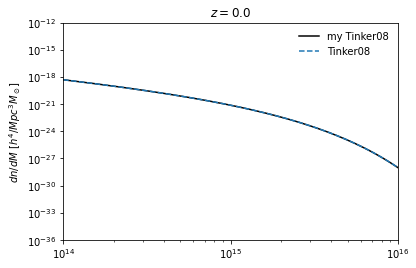

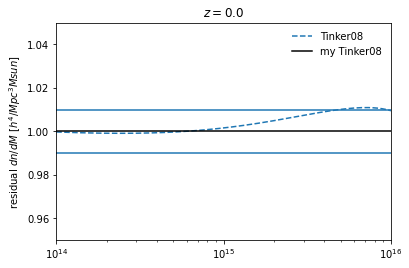

In [8]:
plot_stuff(0.00)

100%|██████████| 1/1 [00:00<00:00, 1620.05it/s]


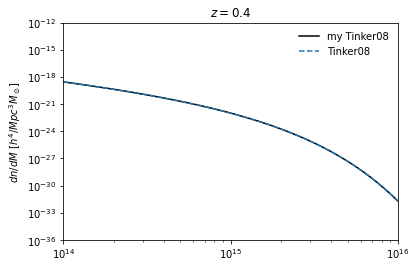

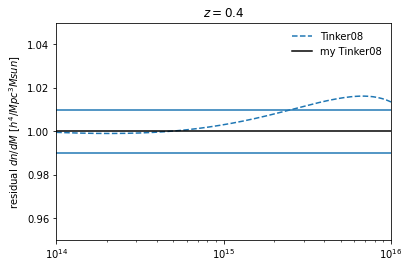

In [9]:
plot_stuff(0.4)

100%|██████████| 1/1 [00:00<00:00, 1617.55it/s]


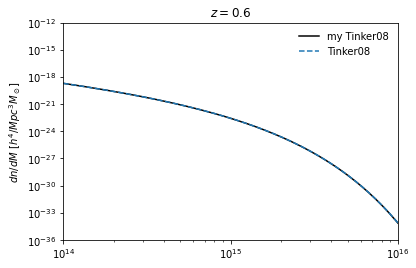

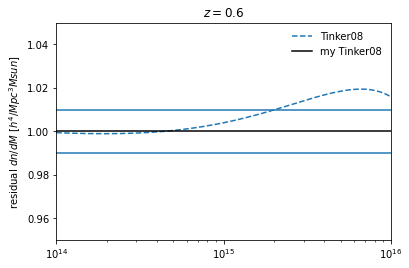

In [10]:
plot_stuff(0.6)

100%|██████████| 1/1 [00:00<00:00, 1628.86it/s]


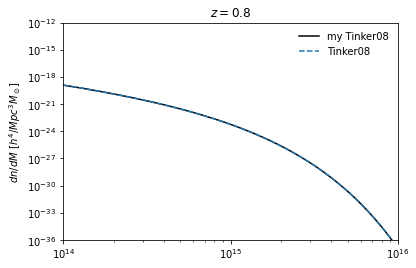

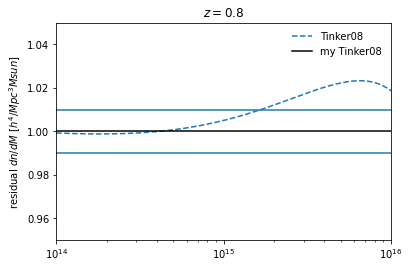

In [11]:
plot_stuff(0.8)

100%|██████████| 1/1 [00:00<00:00, 1639.04it/s]


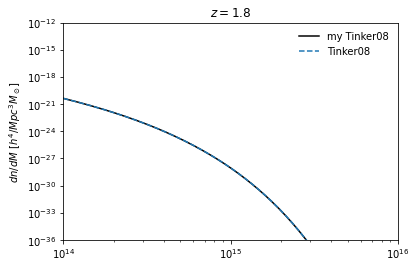

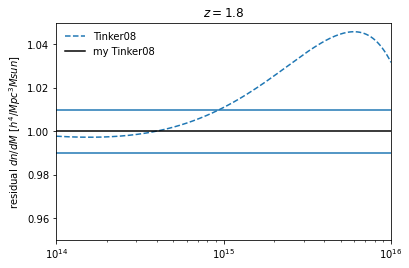

In [12]:
plot_stuff(1.8)

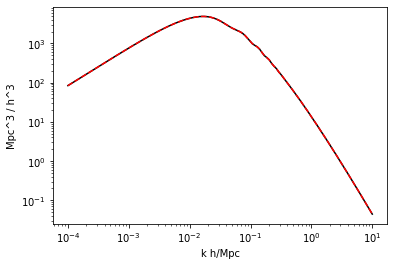

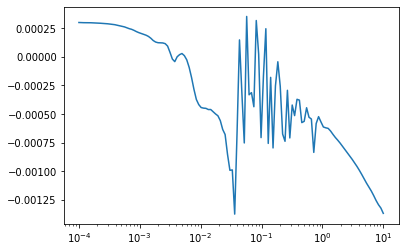

In [13]:
kmin, kmax, nk = 1e-4, 1e1, 128
k = np.logspace(np.log10(kmin), np.log10(kmax), nk) #h/Mpc
a = redshiftToScale(1.8)

pk_lin_ccl = ccl.linear_matter_power(fiducial_ccl_cosmo, k * h, a)
pk_lin = cosmology.Pm(k, scaleToRedshift(a))

plt.plot(k, pk_lin, 'k')
plt.plot(k, pk_lin_ccl * h**3, 'r--')

plt.loglog()
plt.xlabel('k h/Mpc')
plt.ylabel('Mpc^3 / h^3')
plt.show()

plt.plot(k, (pk_lin - pk_lin_ccl * h**3) / pk_lin)
plt.xscale('log')

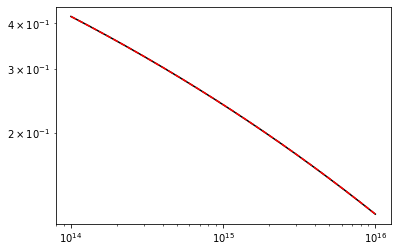

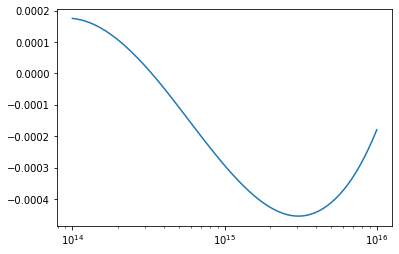

In [14]:
ccl_sigmaM = ccl.sigmaM(fiducial_ccl_cosmo, M/h, a)
sigmaM = cosmology.sigma_m(M, scaleToRedshift(a))
plt.plot(M, sigmaM, 'k')
plt.plot(M, ccl_sigmaM, 'r--')
plt.loglog()
plt.show()

plt.plot(M, (sigmaM - ccl_sigmaM)/sigmaM)
plt.xscale('log')

In [15]:
ccl_rhom = ccl.physical_constants.RHO_CRITICAL * fiducial_ccl_cosmo['Omega_m']
print((cosmology.rho_m_0 - ccl_rhom) / cosmology.rho_m_0)

3.521083011096415e-06


In [16]:
ccl_tinker08 = ccl.halos.MassFuncTinker08(mass_def='200m', mass_def_strict=False)

In [17]:
_, ccl_sigM, ccl_dlns_dlogM = ccl_tinker08._get_logM_sigM(fiducial_ccl_cosmo, M/h, a, return_dlns=True)

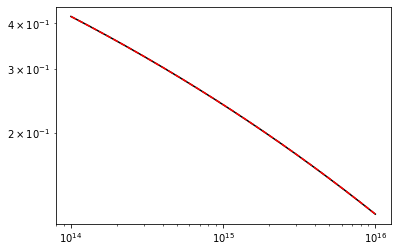

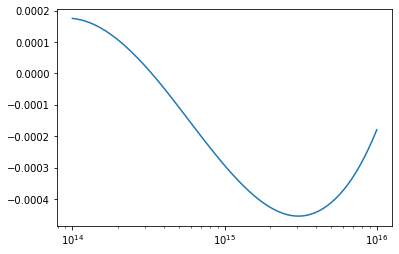

In [18]:
plt.plot(M, sigmaM, 'k')
plt.plot(M, ccl_sigM, 'r--')
plt.loglog()
plt.show()

plt.plot(M, (sigmaM - ccl_sigM)/sigmaM)
plt.xscale('log')

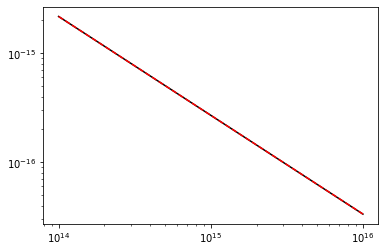

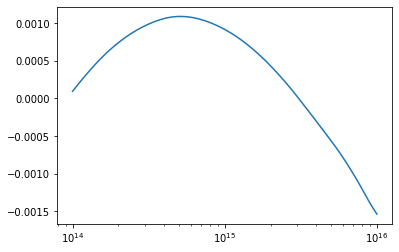

In [19]:
dln_sigma_m = cosmology.dln_sigma_m_dM(M, scaleToRedshift(a))


plt.plot(M, -dln_sigma_m , 'k')
plt.plot(M, ccl_dlns_dlogM/(M * np.log(10) ), 'r--')
plt.loglog()
plt.show()

frac_diff = (-dln_sigma_m -  ccl_dlns_dlogM/(M * np.log(10) ))/-dln_sigma_m
plt.plot(M, frac_diff)
plt.xscale('log')

In [20]:
emulator2 = Tinker08Costanzi13()

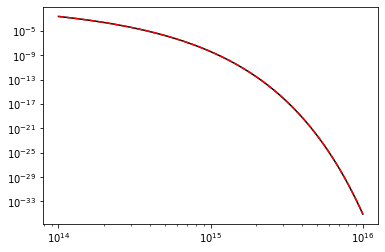

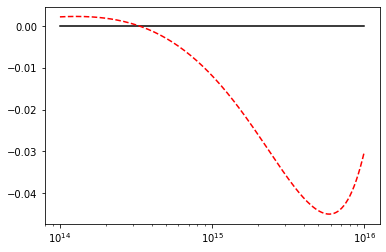

In [21]:
my_f = emulator._get_fsigma(cosmology, sigmaM, a, np.log(M))
ccl_f = ccl_tinker08._get_fsigma(fiducial_ccl_cosmo, ccl_sigM, a, np.log(M))

plt.plot(M, my_f, 'k')
plt.plot(M, ccl_f, 'r--')
plt.loglog()
plt.show()

plt.plot(M, np.zeros_like(my_f), 'k')
plt.plot(M, (my_f - ccl_f)/my_f, 'r--')
plt.xscale('log')

In [22]:
cosmology.f_rho_cb(0.0)/(ccl.physical_constants.RHO_CRITICAL * (fiducial_ccl_cosmo['Omega_c'] + fiducial_ccl_cosmo['Omega_b']))

1.0000074898101807

In [23]:
fiducial_ccl_cosmo.cosmo.spline_params.K_MAX_SPLINE

50.0

In [24]:
#relevant:
#https://github.com/LSSTDESC/CCL/pull/652/files
#https://github.com/lesgourg/class_public/issues/189
#https://github.com/lesgourg/class_public/issues/185
#https://github.com/xzackli/Cosmology-Notebooks/blob/master/CLASS%20vs.%20CAMB.ipynb

In [25]:
 1.0/fiducial_ccl_cosmo.cosmo.spline_params.A_SPLINE_MINLOG_PK-1.0,

(99.0,)

In [26]:
fiducial_ccl_cosmo["N_nu_mass"]

3